# Laserscanning - Exercise 5

#### Please upload the implemented solutions till <u>06.12.2022</u> to the studip folder of your group. The file should follow this format:
##### EX05_Group_XX.ipynb (e.g. EX05_Group_04.ipynb)
(In case you need to upload additional files, please also upload them using the same schema, e.g. EX05_Group_04.zip)

# Segmentation II - RANSAC

## Plane determination using 3 points

If 3 points are given, plane parameters can be computed
using the Hessian Normal Form (HNF). 

HNF: $d=-\hat{n}p$ with $d\in\mathbb{R}$ a scalar representing the distance to the coordinate system origin, $\hat{n}\in\mathbb{R}^3$ normlized normal vector and $p\in\mathbb{R}^3$ some 3D point.

HNF can be determined using three points $p_1,p_2,p_3 \in \mathbb{R}^3$ as follows:
- Normal vector: $n = (p_2 - p_1)\times(p_3 - p_1)$

- Normalization: $\hat{n}=\frac{n}{|n|}$

- Calculate the distance to the origin: $d = - \hat{n}p_1$

## Segmentation with normal vectors/planes

Local normal vectors and plane parameters are usefull features for tasks like segmentation, Classification, Visualization and many more.

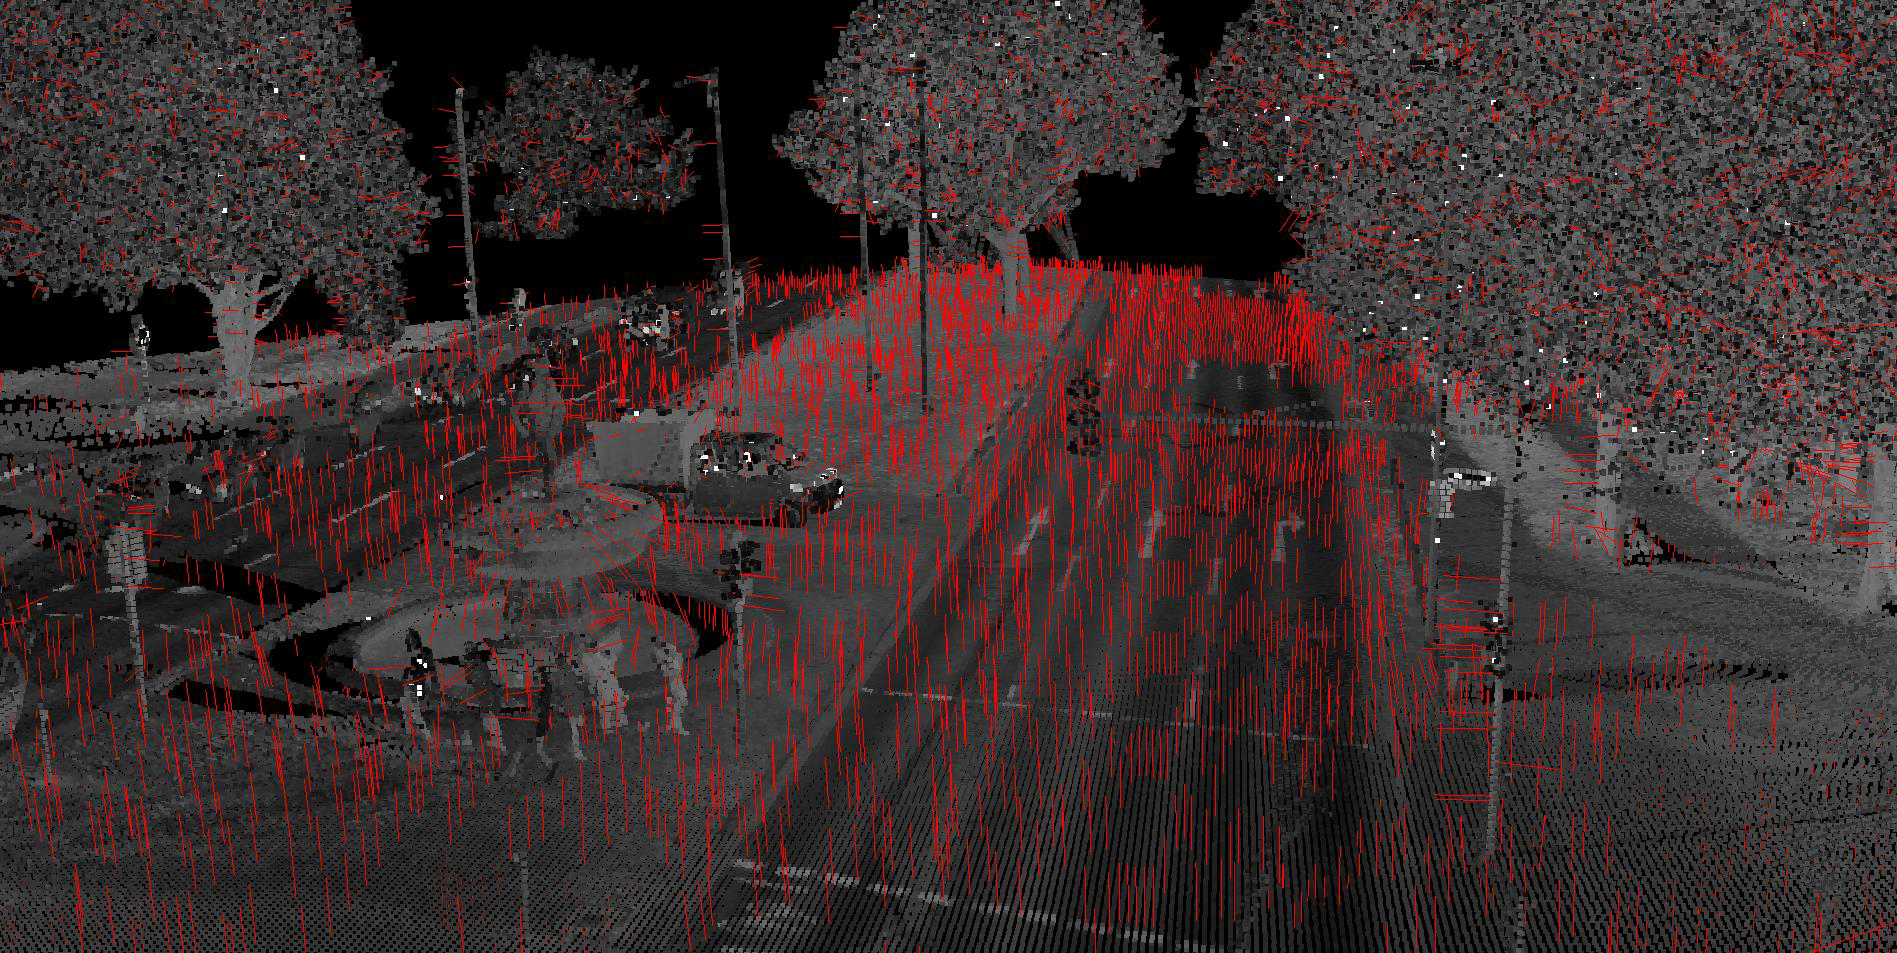

This Image show how different regions like ground and vegetation can (directly) be distinguished by diferent normal vector (red) distributions.

## Segmentation with RANSAC

In the following task we will determin plane paramters from a point cloud utilizing the Random sample consensus (RANSAC). The Main idea of RANSAC is to compare estimated Paramters from randomly selected subsets. If these parameters of different subsets are similar enough (threshold) then they are apply them to the whole dataset.

### Algorithm

- Compute min. number of iterations
$$k>\frac{log(1-z)}{log(1-b)}$$
    - $w$: Prob. that a drawn observation belongs to the model
    - $n$: Number of necessary observations (here: 3)
    - $z$: Desired probability z with which the model shall be found
- Randomly pick 3 points
- Compute plane parameters from these three points
- Count consensus set
    - Define max. distance point-plane
- Repeat k times
- Choose plane parameters with max. consensus set
- (Compute final plane parameters using all plane points) Next exercise

### Tasks

You are given two point sets `schneiderberg15cm_1.ply` and `schneiderberg15cm_2.ply`. The Goal is to determin one plane in the first scene (`schneiderberg15cm_1.ply`) and two planes (`schneiderberg15cm_2.ply`) in the second scene.

- Detect the correct planes in scene 1 and two planes in scene 2 by using RANSAC (hint lecture script No. 5, slides ~54-67). You have to estimate the required number of draws ($k$), that can be computed by the formulas given in the lecture (slides ~55-57). Also, you have to define the probabilities $w$, that a drawn observation belongs to a model, and $z$ with which the model shall be found. Justify your decision in the comment cells!
- Choose a sufficient value for the max. point distance to a wall `max_diff`. Justify your decision!
- Visualize the planes and outliers of both scenes separatly

__Scene 1__
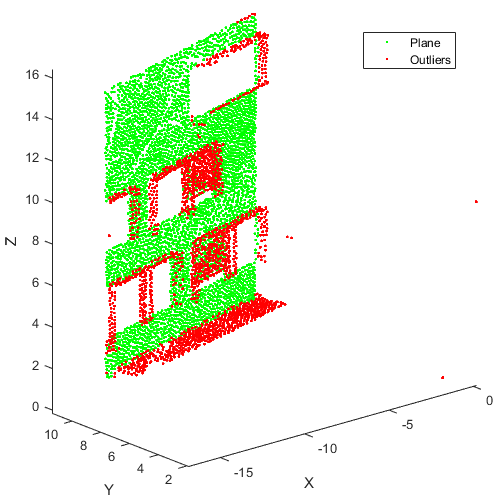

__Scene 2__

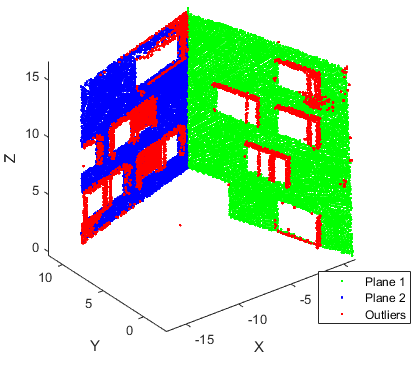

In [62]:
import random
import math
# example of usage of random
print(random.sample(range(1, 100), 4))

[92, 7, 98, 58]


In [63]:
def find_random_points(samplesize, points):
    """Find a set of unique random points from a point cloud
    :params:
        samplesize - size of the generated set
        points - set of points from which random points will be selected
    
    :return:
        random_points - list of random points
    """
    ### BEGIN SOLUTION
    
    random_points=[]
    
    random_num = random.sample(range(len(points)), samplesize)
    for i in range(len(random_num)):
        random_points.append(points[random_num[i]])
    #random_points=np.stack(random_points)
    

    ### END SOLUTION
    
    #raise NotImplementedError()
    
    return random_points

In [64]:
# use HNF here generate plane from 3 points
def plane_from_3_points(points):
    """Determine the normal vector of a plane given 3 points    
    :params:
        points - list of 3 points
    :return:
        (n,d) - Hesse normal form of a plane
                n - normalized normal vector
                d - distance from origin
    """
    ### BEGIN SOLUTION
    
    n = np.cross(points[1]-points[0], points[2]-points[0])
    #print(n)
    #n_normal = n/np.linalg.norm(n,axis=0)
    n_normal = n/math.sqrt(n[0]**2+n[1]**2+n[2]**2)
    #print(n_normal)
    d = -np.dot(n_normal,points[0])
    n = n_normal
    ### END SOLUTION
    
    #raise NotImplementedError()
    
    return n, d
    

<u>Please explain your code here:</u>

In this function we can realize the goal, stochastic pick up three points from points cloud.At first we should make sure how larger our points cloud are, and then we can use the way random.sample() to generate three random number, at last use this number to index the points from points cloud.
First we find n (normalized normal vector) by dot product of two vectors on the plane. Then we multiply the first point by the  negative modal length of the n, so that we get d (distance from origin).

<u>Please explain the Hesse normal form (HNF) here:</u>

The Hesse normal form named after Otto Hesse, is an equation used in analytic geometry, and describes a line in  or a plane in Euclidean space or a hyperplane in higher dimensions. It is primarily used for calculating distances (see point-plane distance and point-line distance).

It is written in vector notation as 𝑑=−𝑛̂ 𝑝1. The dot  indicates the scalar product or dot product. Vector points from the origin of the coordinate system, O, to point P1 that lies precisely in plane or on line E. The vector n_normal  represents the unit normal vector of plane or line E. The distance d is the shortest distance from the origin O to the plane or line.

In [65]:
def count_consensus(n,d,max_diff,points):
    """Count the consensus and gives back the line numbers of the corresponding points        
    :params:
        n - normal vector of the plane
        d - distance of the plane from origin
        max_diff - max distance of a point to plane
        points - array of points
    :return:
        new_points - list - Consensual points
        outliers - list - Outlier points
    """
    ### BEGIN SOLUTION
    new_points = []
    new_outliers = []
    for i in range(len(points)):
 
        p = points[i]
        d_pp = abs(p[0]*n[0]+p[1]*n[1]+p[2]*n[2]+d) #distance 
        
        if d_pp <= max_diff:
            new_points.append(p)
        else:
            new_outliers.append(p)
    #outliers=len(outliers)/len(points)
            
    ### END SOLUTION
    
    #raise NotImplementedError()
    
    return new_points, new_outliers

<u>Please explain your code here:</u>

We use  for loop to iterate through all the points in the point cloud and calculate the distance . If the distance is less than max_diff, it is appended to the list new_points, otherwise it is appended to the list outliers.

<u>Please explain the consensus set here:</u>

We set up a max distance of a point to plane. We observe whether the distance from each point to the plane is less than max_diff. Then we record all the points that match that condition. The more points that meet the condition means the better our current plane is.

In [66]:
import math

# implement RANSAC algorithm
def ransac(points, z, w, max_diff):
    '''Find the normal vectors of the planes in a scene using ransac   
    :params: 
        z - likelihood, that plane can be found
        w - outliers in percent
        t - treshold for accepted observations
    :return:
        n - normalized normal vector
        d - distance from origin
        new_points - list (consensual points)
        outliers - list (outlier points)
    '''
    ### BEGIN SOLUTION#

    b = w**3
    k = int((math.log(1-z)/math.log(1-b))) + 1
    num_max=0
    for i in range(k):
        
        #Find three unique random points from a point cloud
        random_points = find_random_points(3, points)
#        
        #Determine the normal vector of a plane given 3 points and distance of the plane from origin
        n, d = plane_from_3_points(random_points)
        
        #Count the consensus and the numbers of the corresponding points       
        new_points, new_outliers = count_consensus(n,d,max_diff,points)
      
        num = len(new_points)
        t=int(len(points)* 0.7)
        
        #Find the normal vectors of the planes in maximum number 
        if num >= num_max:
            num_max = num
            n_max = n
            d_max = d
            max_points = np.array(new_points)
            outliers = np.array(new_outliers)
            
            if num >= t:
                break
       
 
    ### END SOLUTION
    #raise NotImplementedError()
    
    #return n_max, d_max, np.array(max_points), np.array(outliers)
    return n_max, d_max, max_points, outliers

<u>Please explain your code here:</u>

First we compute min. number of iterations. Than we find three unique random points from a point cloud. After that we count the consensus and the numbers of the corresponding points. We need to find the plane with the most new_points. This plane is the plane we are looking for. We find the normal vectors of the planes and the distance from origin in maximum number.

<u>Please explain the RANSAC algorithm principle with your own word here:</u>

I use three random points to generate a plane. We set up a max distance of a point to plane. We observe whether the distance from each point to the plane is less than max_diff. Then we record all the points that match that condition. The more points that meet the condition means the better our current plane is. Also we set a parameter t. If the points that satisfy the condition exceed t, the program is interrupted. The ideal plane is obtained by this.

## Application

In [67]:
from plyfile import PlyData
import numpy as np
import ipyvolume.pylab as ply
# load data
_data = PlyData.read('schneiderberg15cm_1.ply').elements[0].data
schneider1 = np.stack((_data['x'], _data['y'], _data['z']), axis=1) 
_data = PlyData.read('schneiderberg15cm_2.ply').elements[0].data
schneider2 = np.stack((_data['x'], _data['y'], _data['z']), axis=1) 


print(schneider1)
print(schneider2)

[[ -0.295   3.612  -0.143]
 [-13.91    8.608   4.267]
 [-14.032   8.543   4.198]
 ...
 [-10.168   9.545  13.1  ]
 [-10.048   9.202  12.788]
 [  0.196   1.831   8.703]]
[[ -0.295   3.612  -0.143]
 [-13.91    8.608   4.267]
 [-14.032   8.543   4.198]
 ...
 [ -3.566  11.592   8.683]
 [ -1.095   3.762  16.455]
 [ -3.632  11.741  16.634]]


Apply the ransac algorithm on the given data of scene 1. For this purpose, first, set appropriate values for $z$, $w$ and max. distance to plane.

Please also justify your set values.

In [68]:
# set parameters and apply ransac on scene 1
### BEGIN SOLUTION

z=0.95
w=0.7
max_diff=0.16



### END SOLUTION

#raise NotImplementedError()

<u>Please explain your choosen values here:</u>

Z is expected probability with which the model shall be found. We choose z=0.95. The larger z is, the larger k will be. We choose z =0.95, through the function for k we can get k=5. If we choose z=0.97, k will be at least 6. W is probability that a drawn observation belongs to the mode. After each iteration, we can calculate w, but now we assume w=0.7. Max_diff is the max distance to plane, if the distance of a point is larger than max_diff, we think it is outliers. At first we assume max_diff=0.16, after the iteration we can optimize this value, and max_diff can not be large, if it is large, the plane what we get is not smooth, we can also adjust max_diff accroding to the precision of LIDAR.

In [69]:
# you may use following example code for visualization or another plotting framework you prefer
#import ipyvolume.pylab as ply

# ply.scatter(schneider2[:,0], schneider2[:,1], schneider2[:,2], size=0.5, color='red')
# ply.scatter(schneider1[:,0], schneider1[:,1], schneider1[:,2], size=0.5, color='green')
# ply.show()

Visualize your results for the first scene. Indicate which colors you chose for plane points (e.g. green) and for the outlier points (e.g. red).

In [70]:
### BEGIN SOLUTION


# n_max, d_max, max_points, outliers = ransac(schneider1, z, w, max_diff)
# #print(max_points)
# #print(outliers)
# ply.scatter(max_points[:,0], max_points[:,1], max_points[:,2], size=0.9, color='green')
# ply.scatter(outliers[:,0], outliers[:,1], outliers[:,2], size=0.5, color='red')
# ply.show()


### END SOLUTION

#raise NotImplementedError()

<u>Please explain your findigns here:</u>

With the help of z,w,max_diff can we now use the RANSAC algorithm to find plane. The points cloud of schneider1 is Input and then normal vector, distance of plane from origin point, qualified points and outliers will be output. We use ply to visualize the qualified points and outliers points.


Apply the ransac algorithm on the given data of scene 2. For this purpose, first, set appropriate values for $z$, $w$ and max. distance to plane. Please also justify your set values. Don't forget to detect two planes in the data.

In [71]:
# set parameters and apply ransac on scene 2
### BEGIN SOLUTION
z=0.97
w=0.7
max_diff=0.1

### END SOLUTION

# raise NotImplementedError()

Visualize your results for the second scene. Indicate which colors you chose for the two plane points (e.g. green) and for the remaining outlier points (e.g. red).

In [72]:
### BEGIN SOLUTION
import ipyvolume.pylab as ply

z=0.99
w=0.5
max_diff=0.16
n_max, d_max, max_points, outliers = ransac(schneider2, z, w, max_diff)
plane1 = max_points
#max_points=np.stack(max_points)
ply.scatter(plane1[:,0],plane1[:,1], plane1[:,2], size=0.5, color='blue')

n_max, d_max, max_points, outliers = ransac(outliers, z, w, max_diff)
plane2 = max_points
#max_points=np.stack(max_points)
ply.scatter(plane2[:,0],plane2[:,1], plane2[:,2], size=0.5, color='green')
ply.scatter(outliers[:,0],outliers[:,1], outliers[:,2], size=0.5, color='red')
ply.show()

### END SOLUTION

#raise NotImplementedError()

<u>Please explain your findigns here:</u>

According to the result of Application1 i think the assumed paramters(z,w,max_diff) are good. If you want to improve the accuracy of plane, we can just make the z larger, so that the number of iterations will be larger. And then i make the max distance be smaller, also max_diff=0.15, then the result of plane will be more smooth.

In this Application we should find two planes. At first we input the points cloud of schneider2, and then we use RANSAC algorithm to find the first plane. Outliers from output is very important, because it contains the second plane. So now we use the RANSAC algorithm one more time and the Outliers from the first RANSAC is treated as Input, so that we can get the second plane. At last we use ply to visualize the result.